In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
# define data 
x_1 = np.array([56, 48, 66, 72])
x_2 = np.array([16, 88, 10, 52])
x = np.c_[x_1, x_2]

y = np.array([13, 11, 14, 18])
y = y.reshape(-1, 1)

In [3]:
def compute_cost_vect(x, y, w, b):
    m = x.shape[0]
    
    f_x = np.dot(x, w) + b
    cost = (f_x - y)**2
    cost_sum = np.sum(cost)
    total_cost = (1 / (2.0 * m)) * cost_sum
    return total_cost

In [4]:
def compute_grad_vect(x, y, w, b):
    m = x.shape[0]
    
    f_wb = np.dot(x, w) + b
    error = f_wb - y
    dJ_dw = np.dot(x.T, error) * (1/m)  
    dJ_db = np.sum(error) * (1/m) 
    
    return (dJ_dw, dJ_db)

Lowest cost: 2161.3242
Best model equation: f = -1.5797.x1 + 1.8099.x2 + 29.7830


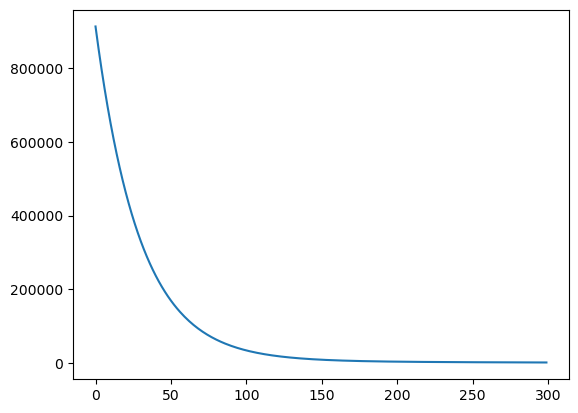

In [5]:
# training

# define model
w_init = np.array([[11], [15]])
b_init = 30

# define count of iterations and alpha parameters
iterations = 300
alpha = 3.0e-6

# avoid modifying global array 
w = copy.deepcopy(w_init)
b = copy.deepcopy(b_init)

# arrays to store cost values and model parameters (w and b) in all steps of training - to future plotting function
cost_history = []
model_history = []

# run training
for i in range(iterations):
    dJ_dw, dJ_db = compute_grad_vect(x, y, w, b)
    
    w = w - np.dot(dJ_dw, alpha)
    b = b - np.dot(dJ_db, alpha)
    
    # save all costs and model parameters in to arrays
    cost_history.append(compute_cost_vect(x, y, w, b))
    model_history.append([w, b])

print(f"Lowest cost: {cost_history[-1]:.4f}")
print("Best model equation: f = {:.4f}.x1 + {:.4f}.x2 + {:.4f}".format(model_history[-1][0][0][0], model_history[-1][0][1][0], model_history[-1][1]))
plt.plot(cost_history)